In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from scipy import stats
import json

In [2]:
music_list=[]
filepath_music = os.path.join("Digital_Music_5.json")
with open(filepath_music) as jsonfile:
    for line in jsonfile: 
        music_json=json.loads(line)
        music_list.append(music_json)
        
music_df = pd.DataFrame(music_list)
music_df  

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A3EBHHCZO6V2A4,5555991584,"Amaranth ""music fan""","[3, 3]","It's hard to believe ""Memory of Trees"" came ou...",5.0,Enya's last great album,1158019200,"09 12, 2006"
1,AZPWAXJG9OJXV,5555991584,bethtexas,"[0, 0]","A clasically-styled and introverted album, Mem...",5.0,Enya at her most elegant,991526400,"06 3, 2001"
2,A38IRL0X2T4DPF,5555991584,bob turnley,"[2, 2]",I never thought Enya would reach the sublime h...,5.0,The best so far,1058140800,"07 14, 2003"
3,A22IK3I6U76GX0,5555991584,Calle,"[1, 1]",This is the third review of an irish album I w...,5.0,Ireland produces good music.,957312000,"05 3, 2000"
4,A1AISPOIIHTHXX,5555991584,"Cloud ""...""","[1, 1]","Enya, despite being a successful recording art...",4.0,4.5; music to dream to,1200528000,"01 17, 2008"
...,...,...,...,...,...,...,...,...,...
64701,A1PQ1PESSO8CMO,B00KILDVEI,Ginger Christmas,"[0, 0]",I like the reggae sound a lot in this song. I ...,4.0,Cool song,1403568000,"06 24, 2014"
64702,A120RH58WVY4W6,B00KILDVEI,"Kelly Dunwell ""avid reader""","[0, 0]",I first heard this on Sirius and had to have i...,5.0,Great Song,1404864000,"07 9, 2014"
64703,A19VJ2IQLO50G0,B00KILDVEI,melinda,"[0, 1]","I absolutely love this song, it downloaded fin...",5.0,Five Stars,1405209600,"07 13, 2014"
64704,AUDSM2CTLLW1Q,B00KILDVEI,Patrick L. Randall,"[0, 0]","Reggae, island beats aren't really my cup of t...",3.0,Well-crafted song,1404864000,"07 9, 2014"


In [3]:
meta_music=[]
i=0
filepath_metamusic = os.path.join("meta_Digital_Music.json")
with open(filepath_metamusic) as jsonfile:
    for line in jsonfile: 
        i+=1
        try: 
            music_json=json.loads(line)
            meta_music.append(music_json)
        except: 
            print(i)
            continue       
            
metamusic_df = pd.DataFrame(meta_music)
metamusic_df

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,[],,[],,Master Collection Volume One,"[B000002UEN, B000008LD5, B01J804JKE, 747403435...",,John Michael Talbot,[],"58,291 in CDs & Vinyl (","[B000002UEN, B000008LD5, 7474034352, B000008LD...","<img src=""https://images-na.ssl-images-amazon....",,,$18.99,0001377647,[],[],NaN
1,[],,[],,Hymns Collection: Hymns 1 &amp; 2,"[5558154950, B00014K5V4]",,Second Chapter of Acts,[],"93,164 in CDs & Vinyl (","[B000008KJ3, B000008KJ0, 5558154950, B000UN8KZ...","<img src=""https://images-na.ssl-images-amazon....",,,,0001529145,[],[],NaN
2,[],,[],,Early Works - Don Francisco,"[B00004RC05, B003H8F4NA, B003ZFVHPO, B003JMP1Z...",,Don Francisco,[],"875,825 in CDs & Vinyl (","[B003H8F4NA, B003ZFVHPO, B003JMP1ZK, B00004RC0...","<img src=""https://images-na.ssl-images-amazon....",,,,0001527134,[],[],NaN
3,[],,[],,So You Wanna Go Back to Egypt,"[B0000275QQ, 0001393774, 0001388312, B0016CP2G...",,Keith Green,[],"203,263 in CDs & Vinyl (","[B00000I7JO, B0016CP2GS, 0001393774, B0000275Q...","<img src=""https://images-na.ssl-images-amazon....",,,$13.01,0001388703,[],[],NaN
4,[],,[1. Losing Game 2. I Can't Wait 3. Didn't He S...,,Early Works - Dallas Holm,"[B0002N4JP2, 0760131694, B00002EQ79, B00150K8J...",,Dallas Holm,[],"399,269 in CDs & Vinyl (","[B0002N4JP2, 0760131694, B00150K8JC, B003MTXNV...","<img src=""https://images-na.ssl-images-amazon....",,,,0001526146,[],[],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74342,[],,"[1. ""Free At Last"" Southside 1:21 2. ""Never Go...",,FUTURE PRESENTS: 56 NIGHTS,[],,FUTURE,[],"695,581 in CDs & Vinyl (",[],"<img src=""https://images-na.ssl-images-amazon....",,,,B01HH7D5KU,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"{'Label:': 'FBG', 'ASIN:': 'B01HH7D5KU'}"
74343,[],,[],,Tori Amos - Little Earthquakes? - Lp Vinyl Record,[],,Tori Amos,[],"1,577,399 in CDs & Vinyl (",[],"<img src=""https://images-na.ssl-images-amazon....",,,,B01HHGQXI2,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"{'Original Release Date:': '2015', 'Number of ..."
74344,[],,[],,EXO - EX'ACT 3rd Album [Korean Lucky One Versi...,"[B07HSM242F, B00VMJ1MMS, B077ZYR799, B00YSOAJG...",,EXO,[],"130,165 in CDs & Vinyl (","[B07HSM242F, B01KNSVGKQ, B077ZYR799, B075D9V4W...","<img src=""https://images-na.ssl-images-amazon....",,,,B01HHRIKKK,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{'ASIN:': 'B01HHRIKKK'}
74345,[],,[],,Vanilla Fudge (Korea Edition),[],,,[],[],"[B000002IAK, B00019PDWU, B00000GX0F, B00000GX0...","<img src=""https://images-na.ssl-images-amazon....",,,,B01HI2B3G2,[],[],{'ASIN:': 'B01HI2B3G2'}


In [4]:
cd_list=[]
filepath_cd = os.path.join("CDs_and_Vinyl_5.json")
with open(filepath_cd) as jsonfile:
    for line in jsonfile: 
        cd_json=json.loads(line)
        cd_list.append(cd_json)
        
cd_df = pd.DataFrame(cd_list)
cd_df

,reviewerID,asin,reviewerName,verified,reviewText,overall,reviewTime,summary,unixReviewTime,style,vote,image
0,A1H1DL4K669VQ9,0001393774,Judith Paladino,True,Love it!! Great seller!,5.0,"04 29, 2016",Five Stars,1461888000,NaN,NaN,NaN
1,A3V5XBBT7OZG5G,0001393774,gflady,True,One of my very favourite albums from one of my...,5.0,"02 23, 2016",One of my very favourite albums from one of my...,1456185600,NaN,NaN,NaN
2,A3SNL7UJY7GWBI,0001393774,Lady Leatherneck,True,"THank you Jesus Lord God, that brother Green's...",5.0,"02 11, 2016",Five Stars,1455148800,NaN,NaN,NaN
3,A3478QRKQDOPQ2,0001393774,jacki,True,I recall loving his other albums and maybe thi...,5.0,"11 28, 2015",forgot but I figured on some of these artists ...,1448668800,NaN,NaN,NaN
4,A23M5VTSN2C3H1,0001393774,Caliope,True,Keith Green was a pioneer in the field of Chri...,5.0,"12 16, 2014",and I have loved every album he did,1418688000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1443750,A30ZM19J0CNAGJ,B01HJDG28E,Reggie: a music lover,True,Night Hawk is ten outstanding new recordings o...,5.0,"12 31, 2016","My favorite cut is the cover of ""(Ghost) Rider...",1483142400,{'Format:': ' Audio CD'},NaN,NaN
1443751,APXJ8QC63EG38,B01HJG3VZI,Steven Schubak,True,ok,3.0,"07 25, 2018",Three Stars,1532476800,{'Format:': ' Audio CD'},NaN,NaN
1443752,A5HIGHKQPINEO,B01HJG3VZI,Oman,True,Great music great sound love the music lots of...,5.0,"07 17, 2018",The sound quality and number of hits,1531785600,{'Format:': ' Audio CD'},NaN,NaN
1443753,A1B26TNQEWHQ4K,B01HJG3VZI,David W. Barsness,True,Really good fun quality stuff,5.0,"06 23, 2018",5fer,1529712000,{'Format:': ' Audio CD'},NaN,NaN


In [5]:
meta_cd=[]
i=0
filepath_metacd = os.path.join("meta_CDs_and_Vinyl.json")
with open(filepath_metacd) as jsonfile:
    for line in jsonfile: 
        i+=1
        try: 
            cd_json=json.loads(line)
            meta_cd.append(cd_json)
        except: 
            print(i)
            continue       
            
metacd_df = pd.DataFrame(meta_cd)
metacd_df

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[CDs & Vinyl, Christian]",,[],,Songs for the Shepherd,"[B0016CP2GS, B0000075PB, B0000275QQ, B00000I7J...",,Keith Green,[],"123,896 in CDs & Vinyl (","[B0016CP2GS, B00000I7JO, B00000I9AH, B00P826ZR...","<img src=""https://images-na.ssl-images-amazon....",,,,0001393774,[],[],NaN
1,"[CDs & Vinyl, Christian, Pop & Contemporary]",,[],,Lift Him Up With Ron Kenoly VHS,"[6303908845, 6303646611, B000008GO1]",,,[],"284,935 in Movies & TV (",[B00000DUDE],Movies & TV,,,,0001501348,[],[],NaN
2,"[CDs & Vinyl, Christian, Children's]",,[],,I Love You,[],,Integrity Music,[],"1,138,833 in CDs & Vinyl (",[],"<img src=""https://images-na.ssl-images-amazon....",,,,0001515209,[],[],NaN
3,"[CDs & Vinyl, Christian, Children's]",,[1) To God Be The Glory2) This Is My Fathers W...,,Hymns: 16 Classic Hymns for Children,"[B00000DPLJ, B000008UPG, B00BQH9RKA, B00KYVHGR...",,Sue Gay,[],"271,064 in CDs & Vinyl (","[B00000DPLL, 0843113006, B00BQH9RKA, B000008UP...","<img src=""https://images-na.ssl-images-amazon....",,,.a-section.a-spacing-mini{margin-bottom:6px!im...,0005072298,[],[],NaN
4,"[CDs & Vinyl, Christian, Children's]",,[Joy To The World 2 The First Noel 3 Hark! The...,,Christmas Carols,"[B0010WAC50, B00000DPLJ]",,Cedarmont Kids,[],"409,293 in CDs & Vinyl (","[B00000DPKG, B0010WAC50, B00000DPKH, B00FSZPM8...","<img src=""https://images-na.ssl-images-amazon....",,,,0005121515,[],[],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516909,"[CDs & Vinyl, Pop]",,[],,Furnaces,"[B07CBLRXNP, B01MYB68L4, B07BZBD1TY, B01MY7Z66...",,Ed Harcourt,[],"251,328 in CDs & Vinyl (","[B07JBYSQ63, B00B8ZOZ84, B0048IDRJQ, B00HVKMYY...","<img src=""https://images-na.ssl-images-amazon....",,,$9.79,B01HJ7FPAG,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"{'Audio CD': '(August 26, 2016)', 'Number of D..."
516910,"[CDs & Vinyl, Country]",,[CHARLIE DANIELS - NIGHTHAWK - CD],,Night Hawk,"[0718074963, B0012GMV5S, B00I89Y2SQ, B07H5VY3L...",,Charlie Daniels Band,[],"68,288 in CDs & Vinyl (","[B07H5VY3LK, B00FLV06V6, B00I89Y2SQ, B01JU6OYK...","<img src=""https://images-na.ssl-images-amazon....",,,$8.00,B01HJDG28E,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"{'Audio CD': '(August 26, 2016)', 'Original Re..."
516911,"[CDs & Vinyl, Pop, Vocal Pop]",,[Five CD set containing a quintet of albums by...,,Original Album Classics,"[B00A7F17Z0, B00975L6O8, B00NMUCLBQ, B000002VE...",,Dionne Warwick,[],"69,386 in CDs & Vinyl (","[B00A7F17Z0, B0000032WJ, B00000IFVX, B00004SW9...","<img src=""https://images-na.ssl-images-amazon....",,,$14.56,B01HJG3UQI,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"{'Audio CD': '(September 9, 2016)', 'Original ..."
516912,"[CDs & Vinyl, Pop]",,[2016 five CD set containing a quintet of orig...,,Original Album Classics,"[B06Y1L22WT, B017CJL0BO, B005JS7VTQ, B01FJ2UKD...",,The Guess Who,[],"1,795 in CDs & Vinyl (","[B000CNE11O, B00000I0QI, B0042OZDP2, B0015XAT4...","<img src=""https://images-na.ssl-images-amazon....",,,$17.28,B01HJG3VZI,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"{'Audio CD': '(September 9, 2016)', 'Original ..."


In [6]:
merging_dig_df = pd.merge(metamusic_df, music_df, on="asin", how="outer")
merging_dig_df = merging_dig_df.dropna(subset=['overall'])
pd.options.display.max_columns = None
merging_dig_df

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details,reviewerID,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
908,[],,[CD > POPULAR MUSIC > ROCK],,Mezzanine,"[B000000WHX, B000001FI7, B000000W6X, B00007KK7...",,Massive Attack,[],"14,388 in CDs & Vinyl (","[B00004WNFZ, B01LY6G5LY, B07GVZMKCL, B01L388UB...","<img src=""https://images-na.ssl-images-amazon....",,,$11.49,B000006045,[],[],"{'Audio CD': '(May 12, 1998)', 'Original Relea...",A3BFJFJRXMWXAX,Andy Williamson,"[0, 0]","Lay down on your couch, put on your headphones...",5.0,A midnight masterpiece: Best of the 1990's,1.012176e+09,"01 28, 2002"
909,[],,[CD > POPULAR MUSIC > ROCK],,Mezzanine,"[B000000WHX, B000001FI7, B000000W6X, B00007KK7...",,Massive Attack,[],"14,388 in CDs & Vinyl (","[B00004WNFZ, B01LY6G5LY, B07GVZMKCL, B01L388UB...","<img src=""https://images-na.ssl-images-amazon....",,,$11.49,B000006045,[],[],"{'Audio CD': '(May 12, 1998)', 'Original Relea...",A34YDWC3VGB366,"Arevee ""Mel""","[0, 0]",The task of finding good new music is a diffic...,4.0,Refreshing Alternative,1.027123e+09,"07 20, 2002"
910,[],,[CD > POPULAR MUSIC > ROCK],,Mezzanine,"[B000000WHX, B000001FI7, B000000W6X, B00007KK7...",,Massive Attack,[],"14,388 in CDs & Vinyl (","[B00004WNFZ, B01LY6G5LY, B07GVZMKCL, B01L388UB...","<img src=""https://images-na.ssl-images-amazon....",,,$11.49,B000006045,[],[],"{'Audio CD': '(May 12, 1998)', 'Original Relea...",A3EHRBLC0FWCIY,"Avernus ""Ogne Speranza, Voi Ch'intrante""","[1, 1]",What could I possibly say in this review that ...,5.0,Essentual.,1.172794e+09,"03 2, 2007"
911,[],,[CD > POPULAR MUSIC > ROCK],,Mezzanine,"[B000000WHX, B000001FI7, B000000W6X, B00007KK7...",,Massive Attack,[],"14,388 in CDs & Vinyl (","[B00004WNFZ, B01LY6G5LY, B07GVZMKCL, B01L388UB...","<img src=""https://images-na.ssl-images-amazon....",,,$11.49,B000006045,[],[],"{'Audio CD': '(May 12, 1998)', 'Original Relea...",A32KPDQ2JT3ANM,Booker,"[1, 5]","Easily this ecclectic group's best album, ""Mez...",5.0,Massive Attack's Finest Hour,1.159315e+09,"09 27, 2006"
912,[],,[CD > POPULAR MUSIC > ROCK],,Mezzanine,"[B000000WHX, B000001FI7, B000000W6X, B00007KK7...",,Massive Attack,[],"14,388 in CDs & Vinyl (","[B00004WNFZ, B01LY6G5LY, B07GVZMKCL, B01L388UB...","<img src=""https://images-na.ssl-images-amazon....",,,$11.49,B000006045,[],[],"{'Audio CD': '(May 12, 1998)', 'Original Relea...",A3LPD7NTGFH7V4,bowery boy,"[6, 26]",What is up with all the glowing reviews people...,2.0,pluhhhhhease!!!!,1.065139e+09,"10 3, 2003"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B00KILDVEI,NaN,NaN,NaN,A1PQ1PESSO8CMO,Ginger Christmas,"[0, 0]",I like the reggae sound a lot in this song. I ...,4.0,Cool song,1.403568e+09,"06 24, 2014"
139047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B00KILDVEI,NaN,NaN,NaN,A120RH58WVY4W6,"Kelly Dunwell ""avid reader""","[0, 0]",I first heard this on Sirius and had to have i...,5.0,Great Song,1.404864e+09,"07 9, 2014"
139048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B00KILDVEI,NaN,NaN,NaN,A19VJ2IQLO50G0,melinda,"[0, 1]","I absolutely love this song, it downloaded fin...",5.0,Five Stars,1.405210e+09,"07 13, 2014"
139049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B00KILDVEI,NaN,NaN,NaN,AUDSM2CTLLW1Q,Patrick L. Randall,"[0, 0]","Reggae, island beats aren't really my cup of t...",3.0,Well-crafted song,1.404864e+09,"07 9, 2014"


In [7]:
##mean = 4.22251414088338
#std = 1.0860728858361215

#merging_dig_df['overall'] = np.random.normal(mean, std, len(merging_dig_df))
#plt.hist(merging_dig_df['overall'], bins=1000)

#plt.show()

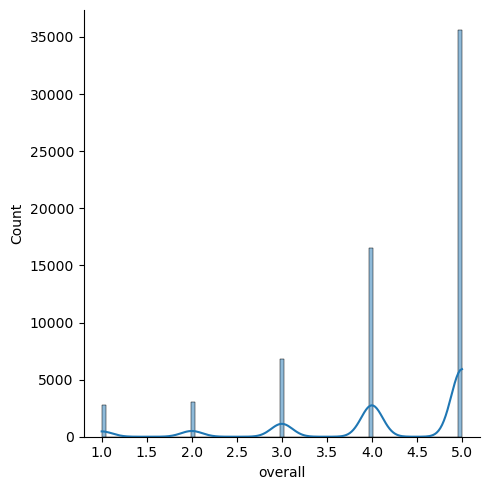

In [33]:
sns.displot(merging_dig_df, x="overall", kde=True)
plt.show()

In [9]:
merging_cd_df = pd.merge(metacd_df, cd_df, on="asin", how="outer")
merging_cd_df = merging_cd_df.dropna(subset=['overall'])
pd.options.display.max_columns = None
merging_cd_df

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details,reviewerID,reviewerName,verified,reviewText,overall,reviewTime,summary,unixReviewTime,style,vote,image
0,"[CDs & Vinyl, Christian]",,[],,Songs for the Shepherd,"[B0016CP2GS, B0000075PB, B0000275QQ, B00000I7J...",,Keith Green,[],"123,896 in CDs & Vinyl (","[B0016CP2GS, B00000I7JO, B00000I9AH, B00P826ZR...","<img src=""https://images-na.ssl-images-amazon....",,,,0001393774,[],[],NaN,A1H1DL4K669VQ9,Judith Paladino,True,Love it!! Great seller!,5.0,"04 29, 2016",Five Stars,1.461888e+09,NaN,NaN,NaN
1,"[CDs & Vinyl, Christian]",,[],,Songs for the Shepherd,"[B0016CP2GS, B0000075PB, B0000275QQ, B00000I7J...",,Keith Green,[],"123,896 in CDs & Vinyl (","[B0016CP2GS, B00000I7JO, B00000I9AH, B00P826ZR...","<img src=""https://images-na.ssl-images-amazon....",,,,0001393774,[],[],NaN,A3V5XBBT7OZG5G,gflady,True,One of my very favourite albums from one of my...,5.0,"02 23, 2016",One of my very favourite albums from one of my...,1.456186e+09,NaN,NaN,NaN
2,"[CDs & Vinyl, Christian]",,[],,Songs for the Shepherd,"[B0016CP2GS, B0000075PB, B0000275QQ, B00000I7J...",,Keith Green,[],"123,896 in CDs & Vinyl (","[B0016CP2GS, B00000I7JO, B00000I9AH, B00P826ZR...","<img src=""https://images-na.ssl-images-amazon....",,,,0001393774,[],[],NaN,A3SNL7UJY7GWBI,Lady Leatherneck,True,"THank you Jesus Lord God, that brother Green's...",5.0,"02 11, 2016",Five Stars,1.455149e+09,NaN,NaN,NaN
3,"[CDs & Vinyl, Christian]",,[],,Songs for the Shepherd,"[B0016CP2GS, B0000075PB, B0000275QQ, B00000I7J...",,Keith Green,[],"123,896 in CDs & Vinyl (","[B0016CP2GS, B00000I7JO, B00000I9AH, B00P826ZR...","<img src=""https://images-na.ssl-images-amazon....",,,,0001393774,[],[],NaN,A3478QRKQDOPQ2,jacki,True,I recall loving his other albums and maybe thi...,5.0,"11 28, 2015",forgot but I figured on some of these artists ...,1.448669e+09,NaN,NaN,NaN
4,"[CDs & Vinyl, Christian]",,[],,Songs for the Shepherd,"[B0016CP2GS, B0000075PB, B0000275QQ, B00000I7J...",,Keith Green,[],"123,896 in CDs & Vinyl (","[B0016CP2GS, B00000I7JO, B00000I9AH, B00P826ZR...","<img src=""https://images-na.ssl-images-amazon....",,,,0001393774,[],[],NaN,A23M5VTSN2C3H1,Caliope,True,Keith Green was a pioneer in the field of Chri...,5.0,"12 16, 2014",and I have loved every album he did,1.418688e+09,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2156151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B01FWSNV4Q,NaN,NaN,NaN,A4X3OX396WX8A,BLAIRFACE,True,Better than any of there other cds.....the voc...,5.0,"11 5, 2017",Jack Glow,1.509840e+09,{'Format:': ' Audio CD'},NaN,NaN
2156152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B01FWSNV4Q,NaN,NaN,NaN,A2F48IDX8Z0AAN,Verimyrkky,True,My husband and I love this band. Great album!,5.0,"09 22, 2017",Great Album,1.506038e+09,{'Format:': ' Audio CD'},NaN,NaN
2156153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B01FWSNV4Q,NaN,NaN,NaN,A3SA404H7PBCGW,Erich,False,Truly amazing album ......this is black metal ...,5.0,"11 13, 2016",Black metal at its very best.,1.478995e+09,{'Format:': ' Audio CD'},2,NaN
2156154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B01FWSNV4Q,NaN,NaN,NaN,A3BU0AXTB34WQW,Storming Mountain,True,Inquisition's last work does not disappoint. A...,5.0,"10 26, 2016",Five Stars,1.477440e+09,{'Format:': ' Audio CD'},NaN,NaN


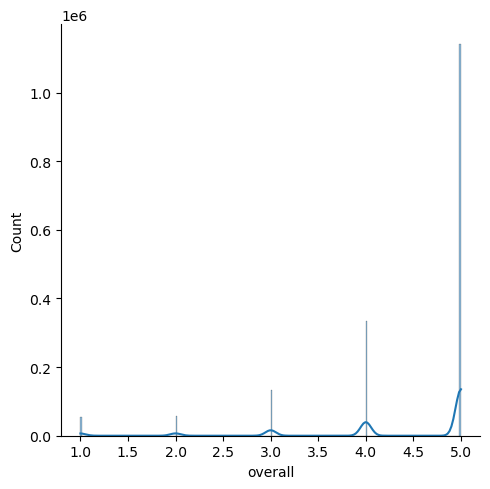

In [34]:
sns.displot(merging_cd_df, x="overall", kde=True)
plt.show()

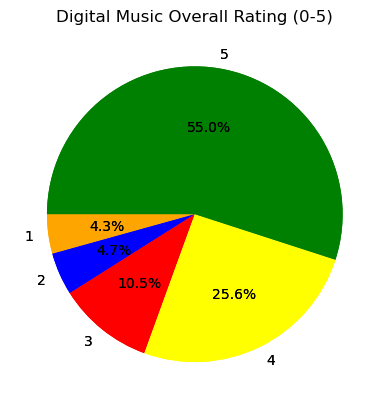

In [39]:
#pie chart showing the percentage of each rating (0-5) in digital music reviews
cd_groupby = merging_dig_df.groupby('overall').count()['asin']
labels = ['1', '2', '3', '4', '5']
explode = (0,0,0,0,0)
colors = ["orange", "blue", "red", "yellow", "green"]
plt.pie(cd_groupby, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=180)
plt.title('Digital Music Overall Rating (0-5)')
plt.show()

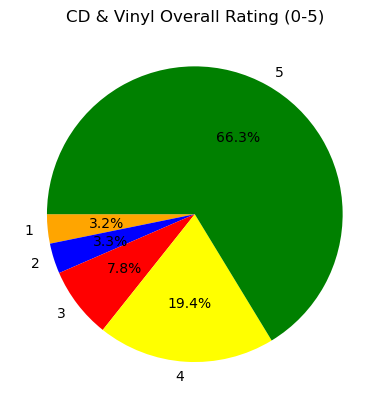

In [40]:
#pie chart showing the percentage of each rating (0-5) in CDs & Vinyl reviews
cd_groupby = merging_cd_df.groupby('overall').count()['asin']
labels = ['1', '2', '3', '4', '5']
explode = (0,0,0,0,0)
colors = ["orange", "blue", "red", "yellow", "green"]
plt.pie(cd_groupby, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=180)
plt.title('CD & Vinyl Overall Rating (0-5)')
plt.show()

In [13]:
#calculations for Lower, Upper and Interquartile of occupancy for overall ratings in Digital Music.
#Lower bound and outlier range is determined
dig_rating = merging_dig_df['overall']
dig_quartiles = dig_rating.quantile([0.25,0.5,0.75])
dig_lq = dig_quartiles[0.25]
dig_medq = dig_quartiles[.5]
dig_uq = dig_quartiles[0.75]
dig_iqr = dig_uq - dig_lq
print('Digital Music overall ratings')
print(f'The lower quartile of occupancy is: {dig_lq}')
print(f'The upper quartile of occupancy is: {dig_uq}')
print(f'The interquartile range of occupancy is: {dig_iqr}')
print(f'The median of occupancy is: {dig_medq}')
dig_lowerbound = dig_lq - 1.5*dig_iqr
dig_upperbound = dig_uq + 1.5*dig_iqr
print(f'Lower Bound: {dig_lowerbound}')
print(f'Values below {dig_lowerbound} could be outliers.')

Digital Music overall ratings
The lower quartile of occupancy is: 4.0
The upper quartile of occupancy is: 5.0
The interquartile range of occupancy is: 1.0
The median of occupancy is: 5.0
Lower Bound: 2.5
Values below 2.5 could be outliers.


In [14]:
#calculations for Lower, Upper and Interquartile of occupancy for overall ratings in CDs & Vinyl.
#Lower bound and outlier range is determined
cd_rating = merging_cd_df['overall']
cd_quartiles = cd_rating.quantile([0.25,0.5,0.75])
cd_lq = cd_quartiles[0.25]
cd_medq = cd_quartiles[.5]
cd_uq = cd_quartiles[0.75]
cd_iqr = cd_uq - cd_lq
print('CD & vinyl overall ratings')
print(f'The lower quartile of occupancy is: {cd_lq}')
print(f'The upper quartile of occupancy is: {cd_uq}')
print(f'The interquartile range of occupancy is: {cd_iqr}')
print(f'The median of occupancy is: {cd_medq}')
cd_lowerbound = cd_lq - 1.5*cd_iqr
cd_upperbound = cd_uq + 1.5*cd_iqr
print(f'Lower Bound: {cd_lowerbound}')
print(f'Values below {cd_lowerbound} could be outliers.')

CD & vinyl overall ratings
The lower quartile of occupancy is: 4.0
The upper quartile of occupancy is: 5.0
The interquartile range of occupancy is: 1.0
The median of occupancy is: 5.0
Lower Bound: 2.5
Values below 2.5 could be outliers.


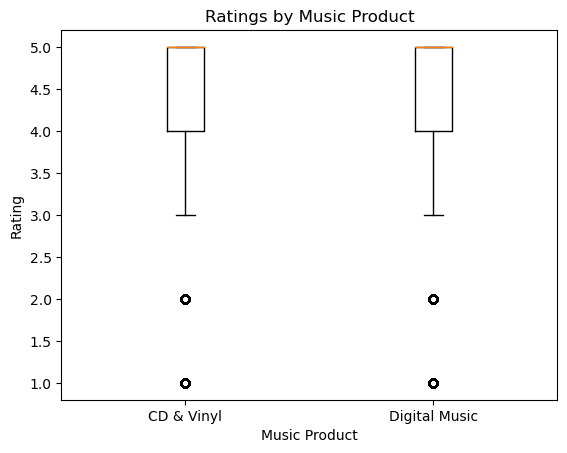

In [41]:
#Box plot between CDs & Vinyl and digital music datasets.
#Figure represents findings from Quartile calculations
box_plot = [cd_rating, dig_rating]

fig1, ax1 = plt.subplots()
ax1.set_title('Ratings by Music Product')
ax1.set_xlabel('Music Product')
ax1.set_ylabel('Rating')

ax1.boxplot(box_plot, labels=["CD & Vinyl","Digital Music"])
plt.show()

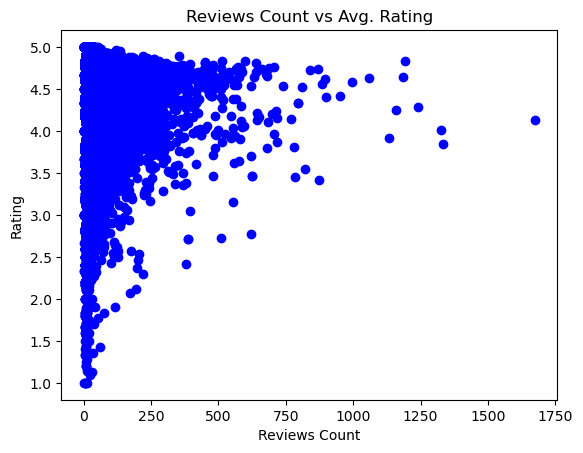

In [42]:
#Scatter plot of Popularity (number of reviews given to an album) vs. Avg Rating in the CDs & Vinyl dataset
#Figure shows a very weak negative correlation between the two variables
cd_popularity = merging_cd_df.groupby(["asin"])['asin'].count()
groupby_cd_rating = merging_cd_df.groupby(['asin'])['overall'].mean()
plt.scatter(cd_popularity, groupby_cd_rating, color = "blue")
plt.xlabel("Reviews Count")
plt.ylabel("Rating")
plt.title("Reviews Count vs Avg. Rating")
plt.show()

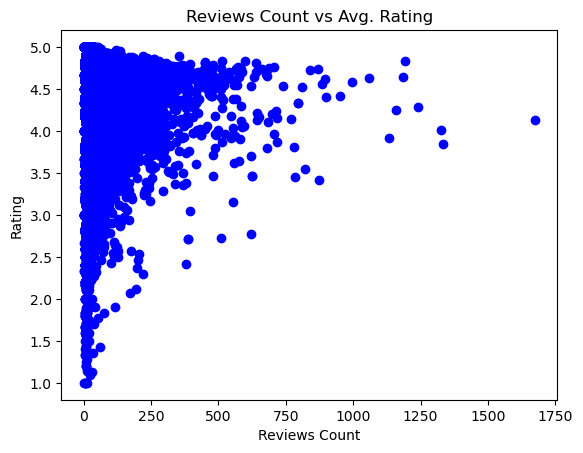

In [43]:
#Scatter plot of Popularity (number of reviews given to an album) vs. Avg Rating in the digital music dataset
#Figure shows a very weak negative correlation between the two variables
dig_popularity = merging_dig_df.groupby(["asin"])['asin'].count()
groupby_dig_rating = merging_dig_df.groupby(['asin'])['overall'].mean()
plt.scatter(cd_popularity, groupby_cd_rating, color = "blue")
plt.xlabel("Reviews Count")
plt.ylabel("Rating")
plt.title("Reviews Count vs Avg. Rating")
plt.show()

In [46]:
print(f"The correlation coefficient between Reviews Count of Album and its Avg. rating is {round(st.pearsonr(cd_popularity, groupby_cd_rating)[0],2)}")

The correlation coefficient between Reviews Count of Album and its Avg. rating is -0.04
